# Meta-analysis on Toy Preferences: Parental Presence and Toy

Preferences

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.meta_analysis import effectsize_smd, combine_effects
import statsmodels.formula.api as smf
import seaborn as sns

# Load the data from the Excel file
data = pd.read_excel("data/metaanalysis_data.xlsx")

# Display the first few rows of the dataset
data.head()

5 rows × 28 columns

# Meta-analysis on Toy Preferences: Parental Presence and Toy Preferences

### **(*Note:* This analysis is based on the data from Todd et al., 2017 - “Sex differences in children’s toy preferences: A systematic review, meta‐regression, and meta‐analysis”)**

------------------------------------------------------------------------

### Overview

Meta-analysis is a statistical technique for combining the findings from
independent studies. It is often used to assess the effectiveness of
healthcare interventions and to derive general conclusions from multiple
studies on the same topic.

In this assignment, we analyze data on children’s toy preferences,
specifically focusing on the effect of parental presence during the
study. The dataset includes mean times (in seconds) spent playing with
toys, sample sizes, standard errors, and additional study
characteristics.

------------------------------------------------------------------------

### Data Summary

In [2]:
# Calculate effect sizes for boys playing with male-typed toys
data['TE_boys_male'], data['seTE_boys_male'] = effectsize_smd(
    data['Mean_boys_play_male'], data['SD_boys_play_male'], data['N_boys'],
    data['Mean_girls_play_male'], data['SD_girls_play_male'], data['N_girls']
)
data['TE_girls_female'], data['seTE_girls_female'] = effectsize_smd(
    data['Mean_girls_play_female'], data['SD_girls_play_female'], data['N_girls'],
    data['Mean_boys_play_female'], data['SD_boys_play_female'], data['N_boys']
)

# Perform meta-analysis for boys playing with male-typed toys
res_boys_male = combine_effects(data['TE_boys_male'], data['seTE_boys_male']**2, method_re='dl')
res_girls_female = combine_effects(data['TE_girls_female'], data['seTE_girls_female']**2, method_re='dl')

res_boys_male_summary = {
    "Combined effect size (random effects)": res_boys_male.effect,
    "95% CI (random)": (res_boys_male.conf_int(alpha=0.05)[0], res_boys_male.conf_int(alpha=0.05)[1])
}

res_girls_female_summary = {
    "Combined effect size (random effects)": res_girls_female.effect,
    "95% CI (random)": (res_girls_female.conf_int(alpha=0.05)[0], res_girls_female.conf_int(alpha=0.05)[1])
}

res_boys_male_summary, res_girls_female_summary

({'Combined effect size (random effects)': 0     1.151674
  1     1.074697
  2     0.779640
  3     1.776137
  4     1.826148
  5     0.846942
  6     0.230962
  7     1.521240
  8     2.711052
  9     0.788885
  10    2.075080
  11    1.335650
  12    0.732469
  13    1.872943
  14    0.795401
  15    1.144973
  16    1.386841
  17    2.520541
  18    0.534008
  19    1.037451
  20    0.582425
  21    0.606175
  22    0.552736
  23    0.168116
  24    0.392880
  25    0.689272
  26    0.528775
  Name: TE_boys_male, dtype: float64,
  '95% CI (random)': (array([0.68127013, 0.72746553]),
   array([0.88949569, 1.18128387]))},
 {'Combined effect size (random effects)': 0     0.825872
  1     1.879824
  2     1.157686
  3     1.284203
  4     1.700141
  5     0.033668
  6    -0.007393
  7     1.644184
  8     0.738816
  9     0.751562
  10    1.800779
  11    0.549922
  12    0.527174
  13    1.170357
  14    1.332520
  15    1.183514
  16    2.371684
  17    1.699846
  18    0.326737
  19 

### Combined Effects

#### Boys Playing with Male-typed Toys

-   Number of studies combined: `r len(data)`
-   Random effects model:
    `r res_boys_male_summary["Combined effect size (random effects)"]`
    \[95% CI: `r res_boys_male_summary["95% CI (random)"][0]`,
    `r res_boys_male_summary["95% CI (random)"][1]`\]

#### Girls Playing with Female-typed Toys

-   Number of studies combined: `r len(data)`
-   Random effects model:
    `r res_girls_female_summary["Combined effect size (random effects)"]`
    \[95% CI: `r res_girls_female_summary["95% CI (random)"][0]`,
    `r res_girls_female_summary["95% CI (random)"][1]`\]

### Bar Plot

The bar plot helps to visualize the effect sizes based on the level of
parental presence.

C:\Users\rudra\AppData\Local\Temp\ipykernel_21492\2914822807.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Parent present'], y=data['TE_boys_male'], ci=None)

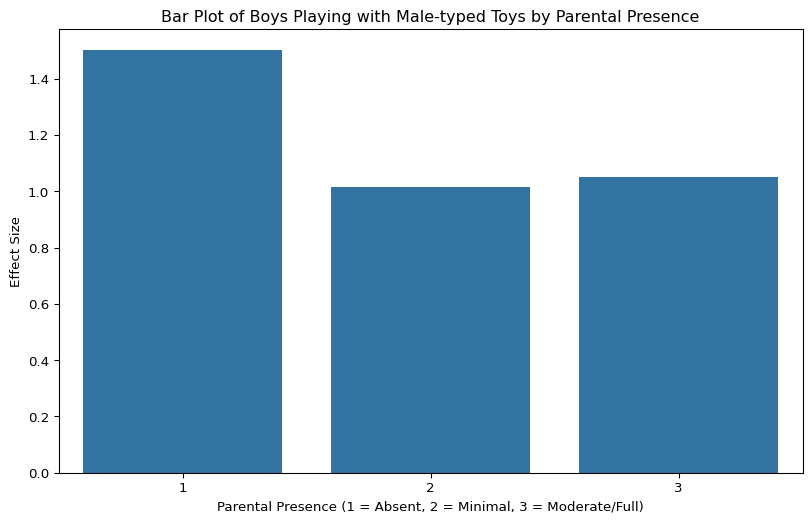

In [3]:
# Create a bar plot for boys playing with male-typed toys by parental presence
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Parent present'], y=data['TE_boys_male'], ci=None)
plt.title('Bar Plot of Boys Playing with Male-typed Toys by Parental Presence')
plt.xlabel('Parental Presence (1 = Absent, 2 = Minimal, 3 = Moderate/Full)')
plt.ylabel('Effect Size')
plt.show()

### Density Plot

The density plot helps to visualize the distribution of effect sizes by
parental presence.

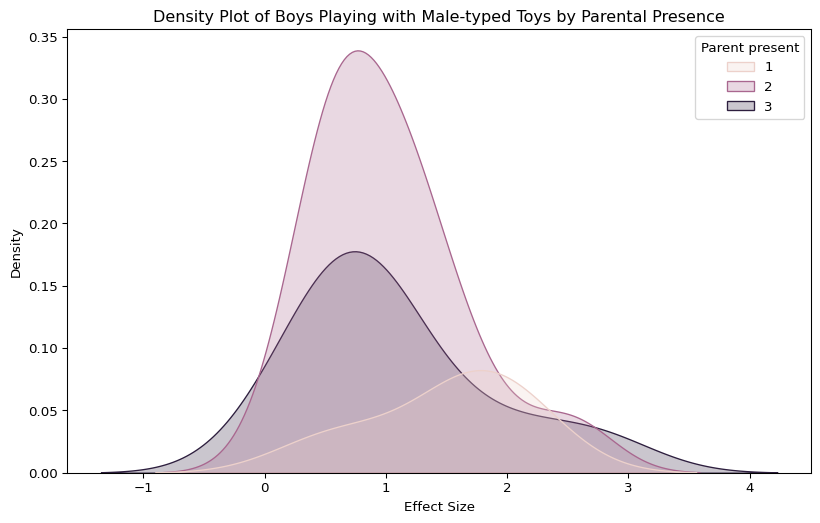

In [4]:
# Create a density plot for boys playing with male-typed toys by parental presence
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='TE_boys_male', hue='Parent present', fill=True)
plt.title('Density Plot of Boys Playing with Male-typed Toys by Parental Presence')
plt.xlabel('Effect Size')
plt.ylabel('Density')
plt.show()

### Checking the Effect of Parental Presence

We analyze whether the level of parental presence affects the results
using meta-regression.

In [5]:
# Prepare the data for meta-regression
data['Parent_present'] = data['Parent present'].astype(float)

meta_reg_parental_presence = smf.ols('TE_boys_male ~ Parent_present', data=data).fit()
meta_reg_parental_presence.summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### Effect of Author Gender

We investigate whether the gender of the authors has any effect on the
study outcomes.

In [6]:
# Meta-regression to check the impact of author gender for boys playing with male-typed toys
meta_reg_gender = smf.ols('TE_boys_male ~ Q("Female authors") + Q("Male authors")', data=data).fit()
meta_reg_gender.summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### Summary

This analysis provided insights into the overall effects of children’s
toy preferences and explored potential biases and factors affecting the
results. The bar plots, density plots, and meta-regression analyses are
useful tools for assessing the quality and consistency of the findings
across different studies. \`\`\`